# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de fotocasa, el cual es uno de los sitios mas populares de bienes raíces en España. Por favor no hagas estos (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa mas cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

Let's start with precisely that question... Good luck!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [4]:
import pandas as pd
import numpy as np
from numpy import var
import matplotlib.pyplot as plt
import seaborn as sns

# this CSV file contains semicolons instead of comas as separator
pd.set_option('display.max_columns', None)
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,¡¡¡IDEAL PROFESIONALES E INVERSORES¡¡¡ \nINFOC...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,0,0,0,0,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,"Planta baja con cocinas, una de ellos posibili...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,NaN,Torrelodones,España,Madrid,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,0,0,0,0,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,"Piso de 3 dormitorios con armarios empotrados,...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velill

#### Ejercicio 01. ¿Cuál es la casa mas cara en el todo el dataset? (★☆☆)

Imprime la direccion y el precio de la casa seleccionada. Por ejemplo:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [10]:
most_expensive = ds['price'].max()
max_filtered = ds[ds['price'] == most_expensive]

print(f"La casa más cara tiene un valor de {most_expensive} euros y se encuentra en {max_filtered['address']}")

La casa más cara tiene un valor de 8500000 euros y se encuentra en 13110    El Escorial
Name: address, dtype: object


#### Ejercicio 02. ¿Cuál es la casa mas barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [ ]:
low_price = ds[ds['price'] != 0]  # <-- Eliminamos las viviendas que tengan un precio de venta de 0 euros
cheapest = low_price['price'].min()

low_filtered = ds[ds['price'] == cheapest]

print(f"La casa más barata tiene un valor de {low_filtered} euros y se encuentra en {low_filtered['address']}")

#### Ejercicio 03. ¿Cuál es la casa mas grande y la mas pequeña del dataset? (★☆☆)

Imprime la dirección y el area de las casas seleccionadas. Por ejemplo:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [46]:
smaller_house = int(ds['surface'].min())
smaller_located = ds[ds['surface'] == smaller_house]

bigger_house = int(ds['surface'].max())
bigger_located = ds[ds['surface'] == bigger_house]

print(f"la casa mas grande se encuentra en {bigger_located['address']} con una superficie de {bigger_house} metros")
print(f"la casa mas pequeña se encuentra en {smaller_located['address']} con una superficie de {smaller_house} metros")

la casa mas grande se encuentra en 6794    Sevilla la Nueva
Name: address, dtype: object con una superficie de 249000 metros
la casa mas pequeña se encuentra en 498    Calle Amparo,  Madrid Capital
Name: address, dtype: object con una superficie de 15 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3,...`

In [44]:
poblaciones = ds['level5'].unique()
print(poblaciones)

['Arganda del Rey' 'Fuenlabrada' 'Boadilla del Monte'
 'Las Rozas de Madrid' ' Madrid Capital' 'Villaviciosa de Odón' 'Pinto'
 'Valdemoro' 'Navalcarnero' 'Pozuelo de Alarcón' 'Torrejón de Ardoz'
 'Navalagamella' 'San Sebastián de los Reyes' 'Rivas-vaciamadrid'
 'Alpedrete' 'Móstoles' 'San Fernando de Henares' 'Coslada'
 'Becerril de la Sierra' 'Alcalá de Henares' 'Chinchón' 'Parla' 'Alcorcón'
 'El Escorial' 'Leganés' 'Pedrezuela' 'Majadahonda'
 'Villanueva de la Cañada' 'Villanueva del Pardillo' 'Torrelodones'
 'Moralzarzal' 'Mejorada del Campo' 'Aranjuez' 'Corpa' 'Getafe'
 'Velilla de San Antonio' 'Sevilla la Nueva' 'San Martín de la Vega'
 'Villalbilla' 'Collado Villalba' 'Alcobendas' 'El Molar (Madrid)'
 'Moraleja de Enmedio' 'Algete' 'Campo Real' 'Torrejón de la Calzada'
 'Colmenar Viejo' 'Valdemorillo' 'Fuente El Saz de Jarama' 'Tres Cantos'
 'Arroyomolinos (Madrid)' 'Griñón' 'Paracuellos de Jarama' 'Guadarrama'
 'Titulcia' 'Galapagar' 'Collado Mediano' 'Los Molinos'
 'San Lorenzo

#### Ejercicio 05. ¿El data set contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`true` o `fase`) seguido de la fila/columna que contiene el NAs.

In [61]:
ds.isnull()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


#### Ejercicio 06. Elimina los NAs del data set, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [60]:
ds_modified = ds.drop(labels = ["zipCode","customZone"], axis = 1)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido

In [27]:
poblacion = ds[ds["level5"] == "Arroyomolinos (Madrid)"]

precio_medio = int(poblacion["price"].mean())
print(f"El precio medio de la vivienda en Arroyomolinos es {precio_medio}$")

El precio medio de la vivienda en Arroyomolinos es 294541$


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


In [ ]:
plt.hist(poblacion["price"], bins = 7, range = (0, 600000), color = "blue", edgecolor = "palegreen")
plt.xlabel("Rango de Precios")
plt.ylabel("Número propiedades")
plt.title("Arroyomolinos")

**TODO: Markdown**. Para escribir aquí, has doble click en este celda y elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿ Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedio y escribe una conclusion acerca de ellos

In [59]:
poblacion_valdemorillo = ds[ds["level5"] == "Valdemorillo"]
precio_medio_valdemorillo = int(poblacion_valdemorillo["price"].mean())

poblacion_galapagar = ds[ds["level5"] == "Galapagar"]
precio_medio_galapagar = int(poblacion_galapagar["price"].mean())

if precio_medio_galapagar == precio_medio_valdemorillo:
    print(f"El precio medio de Valdemorillo y Galapagar son el mismo {precio_medio_valdemorillo}$")
else:
    print(f"El precio medio de Valdemorillo({precio_medio_valdemorillo}$) y el de Galapagar({precio_medio_galapagar}$) son distintos")

El precio medio de Valdemorillo (363860$) y el de Galapagar(360063$) son distintos


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (price/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio y escribe una conclusion acerca de ellos.

Pista: Crea una nueva columna llamada `pps` (price per square) y luego analiza los valore.s

In [19]:
poblacion_valdemorillo = ds[ds["level5"] == "Valdemorillo"]

precio_medio_valdemorillo = int(poblacion_valdemorillo["price"].mean())
suelo_valdemorillo = int(poblacion_valdemorillo["surface"].mean())
ppm_val = int(precio_medio_valdemorillo / suelo_valdemorillo)


poblacion_galapagar = ds[ds["level5"] == "Galapagar"]

precio_medio_galapagar = int(poblacion_galapagar["price"].mean())
suelo_galapagar = int(poblacion_galapagar["surface"].mean())
ppm_gal = int(precio_medio_galapagar / suelo_galapagar)


print(f"el precio promedio(precio/metros cuadrados) de Valdemorillo es: {ppm_val}$")
print(f"el precio promedio(precio/metros cuadrados) de Galapagar es: {ppm_gal}$")

el precio promedio(precio/metros cuadrados) de Valdemorillo es: 1039$
el precio promedio(precio/metros cuadrados) de Galapagar es: 1180$


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusion al respecto.

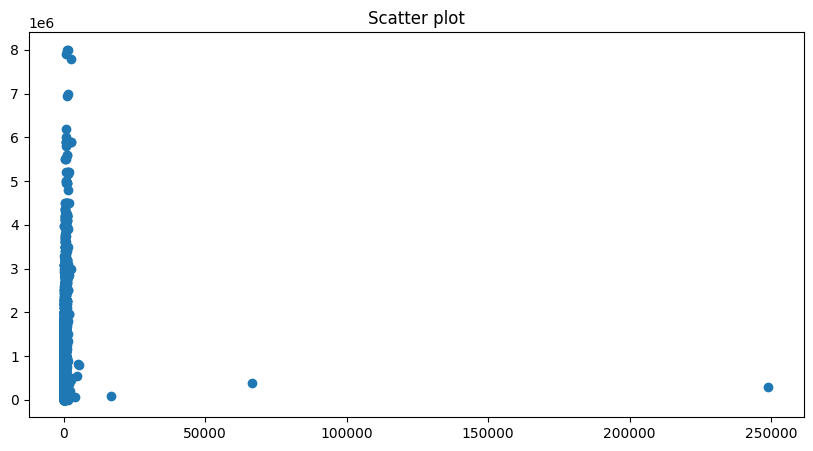

In [16]:
X = [ds["surface"]]
y = [ds["price"]]

plt.figure(figsize = (10, 5))

plt.scatter(X, y)

plt.title("Scatter plot")
plt.show()

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [16]:
agencias = ds['realEstate_name'].value_counts()
print(agencias)

realEstate_name
engel volkers madrid    470
infocasa consulting     300
outletdeviviendas       260
housell                 250
solvia inmobiliaria     207
                       ... 
javier garcia             1
ir inmobiliaria           1
jesus                     1
julio                     1
nieves                    1
Name: count, Length: 1821, dtype: int64


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [15]:
poblaciones = ds['level5'].value_counts()
print(poblaciones)

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del Dataframe original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Pista: Filtra el Dataframe original usando la columna `level5` y la función `isin`

In [11]:
cinturon_sur = (["Fuenlabrada", "Getafe", "Leganés", "Alcorcón"])
cs = ds[ds.level5.isin(cinturon_sur)]
cs.head(10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,VIVIENDAS365-VENDE- Hermosa Vivienda en el Bar...,"Avenida Los Pinos, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,0,0,0,0,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,AREA UNO asesores inmobiliarios oficina de las...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,0,0,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
161,162,153440116,False,prolucisa,916350416.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,123.0,239500,2019-12-28T18:36:34.2072664Z,"Piso amplisimo, impecable, en perfecto estado ...",Fuenlabrada,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,El Arroyo - La Fuente,NaN,El Arroyo - La Fuente,0,0,0,0,0,0,0,0,0,0,"40,2744807718156","-3,79192471504211",NaN,NaN
169,170,153920011,False,grupo tizona,911226046.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,2.0,195.0,290000,2019-12-28T18:36:34.2072664Z,"Grupo Tizona Getafe, vende una fantástica casa...","Calle General Castaños, Getafe",España,Madrid,Madrid,Zona Sur de Madrid,"Getafe, Zona de",Getafe,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,31111","-3,73066",NaN,NaN
189,190,153950689,False,bidx1 espana,914892974.0,https://www.fotocasa.es/es/comprar/vivienda/fu...,3.0,1.0,60.0,60000,2019-12-28T18:38:30.0840614Z,Piso de 60 m2 aproximados en 1ª planta exterio...,"Del Carmen, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,La Fortuna,NaN,La Fortuna,0,0,0,0,0,0,0,0,0,0,"40,356919","-3,77769",NaN,NaN
193,194,153925845,False,inmobiliaria nuevo leganes,918007516.0,https://www.fotocasa.es/es/comprar/vivienda/fu...,3.0,1.0,70.0,140000,2019-12-28T18:38:30.0840614Z,OPORTUNIDAD PISO EN MUY BUENA ZONA CON MUCHA L...,Leganés,España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,0,0,0,0,0,0,0,0,0,0,"40,3274","-3,77152",NaN,NaN
214,215,153950663,False,bidx1 espana,914892974.0,https://www.fotocasa.es/es/comprar/viv

#### Ejercicio 15. Traza un gráfico de barra de la media de los precios y explica lo que observas (debes usar el subconjunto obtenido de la pregunta 14) (★★★)

Imprima un gráfico de barra de la media de precios y escriba en la celda Markdown un breve análisis del sector.

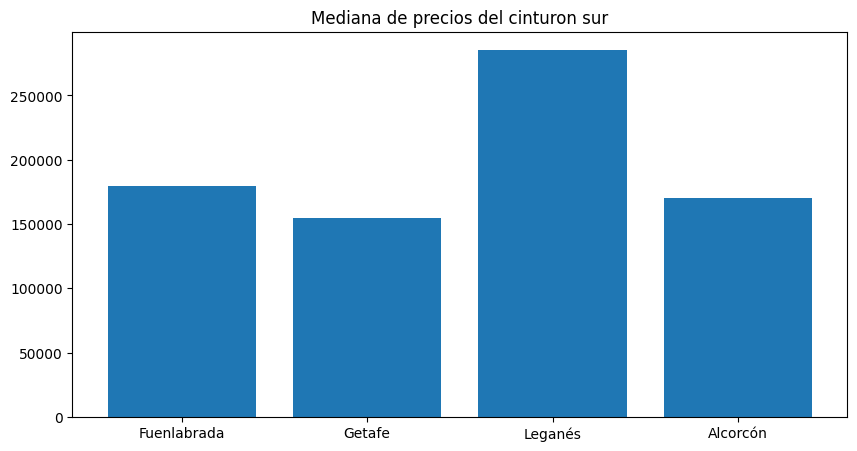

In [9]:
Fuenlabrada = ds[ds["level5"] == "Fuenlabrada"]
pmFuenlabrada = Fuenlabrada["price"].median()

Alcorcon = ds[ds["level5"] == "Alcorcón"]
pmAlcorcon = Alcorcon["price"].median()

Getafe = ds[ds["level5"] == "Getafe"]
pmGetafe = Getafe["price"].median()

Leganes = ds[ds["level5"] == "Leganés"]
pmLeganes = Leganes["price"].median()


plt.figure(figsize = (10,5))
plt.bar(cinturon_sur, [pmAlcorcon, pmFuenlabrada, pmGetafe, pmLeganes])

plt.title("Mediana de precios del cinturon sur")
plt.show()

#### Ejercicio 16. Calcula la media y la varianza de la muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Imprime ambos valores por  cada variable.

In [6]:
# TODO

#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [ ]:
# TODO

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

In [ ]:
# TODO

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [ ]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

In [ ]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón ur de Madrid por color d cada población (debes usar el subconjunto obtenido en la pregunta 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar u código simple que transforme las columnas de coordenadas en un diccionario de python (agrega más información si es necesario) y agrégala al mapa.

In [10]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud et -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
